In [592]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# Ознакомительная часть

Набор данных изначально получен из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое предсказание наличия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. Все пациенты в исследовании — женщины не моложе 21 года, потомки индейцев пима.

**Pregnancies** - количество беременностей  
**Glucose** - уровень глюкозы в крови  
**BloodPressure** - измерение кровяного давления  
**SkinThickness** - толщина кожи  
**Insulin** - уровень инсулина в крови  
**BMI** - индекс массы тела  
**DiabetesPedigreeFunction** - процент диабета  
**Age** - возраст  
**Outcome**	- окончательный результат, 1 означает «Да», а 0 — «Нет».

In [593]:
df = pd.read_csv('diabetes.csv')

In [594]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Таблица состоит из числовых данных, что соответствует их смысловой нагрузке. Замена на другой тип не требуется. Пропусков в таблице нет. Строк с данными 768.

In [596]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют.

In [597]:
df.columns = df.columns.str.lower()

Колонки приведены в соответствующий вид

In [598]:
df = df.rename(columns = {'bloodpressure':'blood_pressure', 'skinthickness':'skin_thickness','diabetespedigreefunction':'diabetes_pedigree_function'})

# Анализ данных

## Общие сведения

In [599]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Из общих сведений, кроме основных статистических характеристик, мы видим, что чаcть показателей, таких как глюкоза, кровяное давление, толщина кожи, инсулин и вес равны нулю. Проанализируем эти показатели.

## Пропуски в данных

In [600]:
columns_name = df.columns
columns_name

Index(['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
       'bmi', 'diabetes_pedigree_function', 'age', 'outcome'],
      dtype='object')

In [601]:
df_nan = df.copy() 
list_nan = ['glucose', 'blood_pressure', 'skin_thickness', 'insulin','bmi', 'diabetes_pedigree_function', 'age']

for col_l in list_nan:
  print('-'* 25)
  #print(col_l, df_nan[col_l].sort_values().unique())
  print(col_l,': кол-во пропусков',df_nan[df_nan[col_l]==0][col_l].count(),
        ', процент пропусков', round(df_nan[df_nan[col_l]==0][col_l].count()/len(df_nan)*100, 2),'%')


-------------------------
glucose : кол-во пропусков 5 , процент пропусков 0.65 %
-------------------------
blood_pressure : кол-во пропусков 35 , процент пропусков 4.56 %
-------------------------
skin_thickness : кол-во пропусков 227 , процент пропусков 29.56 %
-------------------------
insulin : кол-во пропусков 374 , процент пропусков 48.7 %
-------------------------
bmi : кол-во пропусков 11 , процент пропусков 1.43 %
-------------------------
diabetes_pedigree_function : кол-во пропусков 0 , процент пропусков 0.0 %
-------------------------
age : кол-во пропусков 0 , процент пропусков 0.0 %


В столбцах skin_thickness и insulin нулевых значений слишком много, их нельзя просто удалить. Заменим эти пропуски случайными значениями вокруг среднего в качестве замены. Диапазон будет от среднего - 1,2 стандартного отклонения до среднего + 1,2 стандартного отклонения. Это позволит избежать повтора значений для всех данных.

In [602]:
for col_2 in ["skin_thickness", "insulin"]:
    mean = df[df[col_2] != 0][col_2].mean()
    std = df[df[col_2] != 0][col_2].std()
    values = df[col_2].values
    for i, val in enumerate(values):
        if val == 0:
            values[i] = mean + std * (np.random.rand() * 2 - 1) * 1.2
    df[col_2] = pd.Series(values).astype(df[col_2].dtype)        

In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Нулевых значений в столбцах glucose, blood_pressure, bmi не сильно много. Если мы их удалим, это будет лучшим решением.

In [604]:
df = df[(df['glucose']!=0)&(df['blood_pressure']!=0)&(df['bmi']!=0)].copy()

In [605]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.015193,154.026243,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.775688,104.244702,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,13.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,22.000000,78.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,135.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,36.000000,206.000000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Теперь можно приступить к анализу данных и посмотреть на статистические характеристики пациентов. 

## Анализ по гистограммам

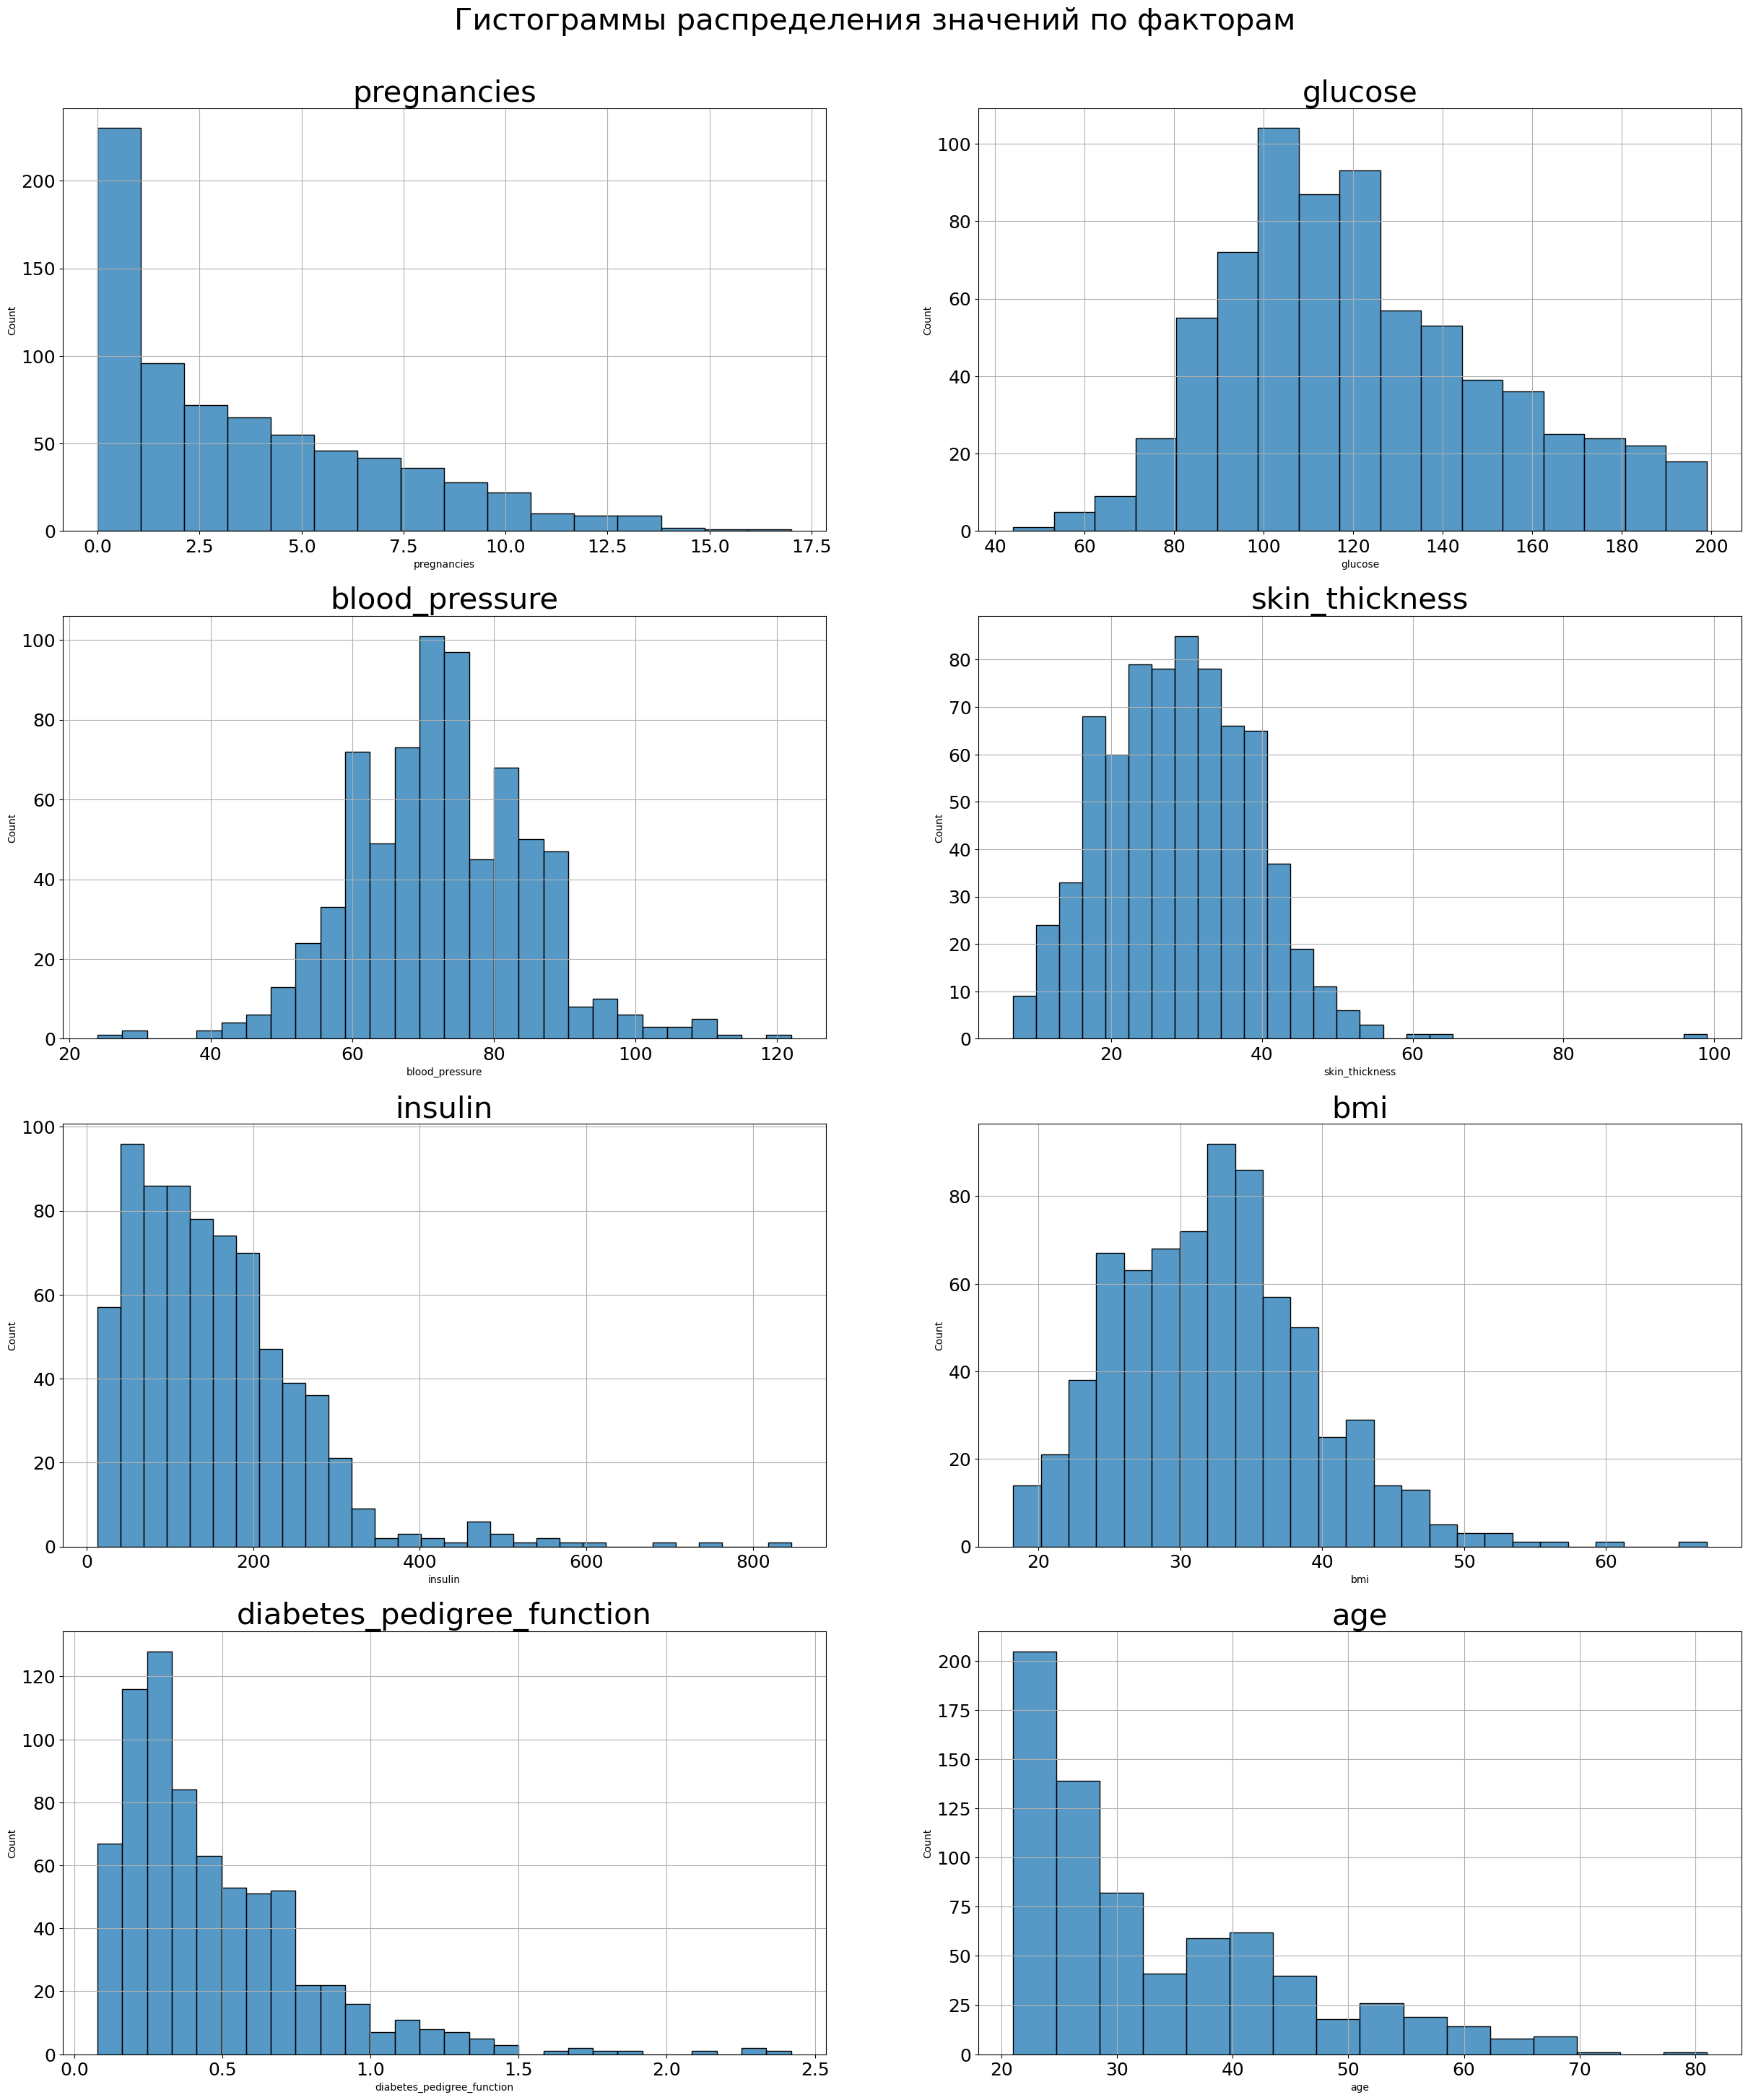

In [606]:
fig, axs = plt.subplots(4, 2, figsize=(30, 35))
for i, col in enumerate(df.columns.drop("outcome")):
    ax = axs[i // 2][i % 2]
    sns.histplot(data=df, x=col, ax=ax)
    ax.grid()
    ax.tick_params(labelsize=18)
    ax.set_title(col, fontsize=30)
fig.suptitle("Гистограммы распределения значений по факторам", fontsize=30, y=0.92)
plt.show()

- беременность: большинство женщин, принявших участие в исследовании не имеет детей или имеет одного — двух;
- глюкоза: гистограмма имеет нормальное распределение, у большинства пациентов уровень глюкозы в крови 100-130;
- кровяное давление: гистограмма также имеет нормальное распределение (большинство значений в центре). Самое распространенное давление 70-80;
- толщина кожи: гистограмма смещена вправо из-за выброса 100 мм, обычные значения 20-40 мм;
- инсулин: гистограмма сильно смещена вправо, наиболее частое значение от 20 до 200. После отметки 300 резкое падение (на гистограмме четко виден "хвост" из аномальных значений);
- вес: есть смещение вправо. Наиболее часто встречается индекс массы тела - 25-40;
- предрасположенность к диабету: гистограмма сильно смещена вправо, есть аномальные значения после отметки в 1.0. Основные значения лежат в диапазоне от 0,2 до 0,5;
- возраст:  в исследовании приняли участие в основном молодые женщины, чей возраст составил 20-30 лет. 

## Соотношение положительного и отрицательного диагнозов.

In [607]:
outcome = df['outcome'].value_counts().reset_index()
outcome['persent'] = round(outcome['outcome']/outcome['outcome'].sum()*100,1)
outcome = outcome.drop(columns='index') 
outcome

,outcome,persent
0,475,65.6
1,249,34.4


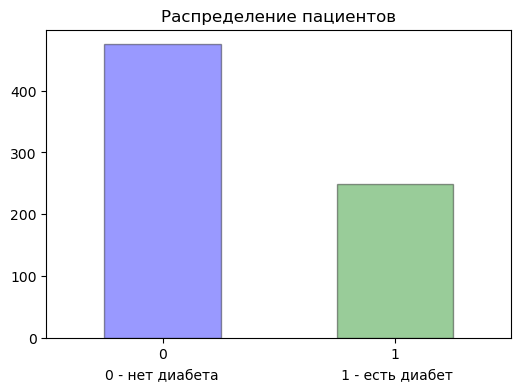

In [608]:
df.groupby('outcome')['age'].count().plot(kind = 'bar',figsize=(6,4),  edgecolor='black', color = ['b','g'], alpha = 0.4, rot=0)
plt.xlabel('0 - нет диабета                            1 - есть диабет')
plt.title('Распределение пациентов')
plt.show()

Таким образом, в исследовании принимают участие 65,6% здоровых людей и 34,4% людей, имеющих сахарный диабет. 


## Анализ boxplot

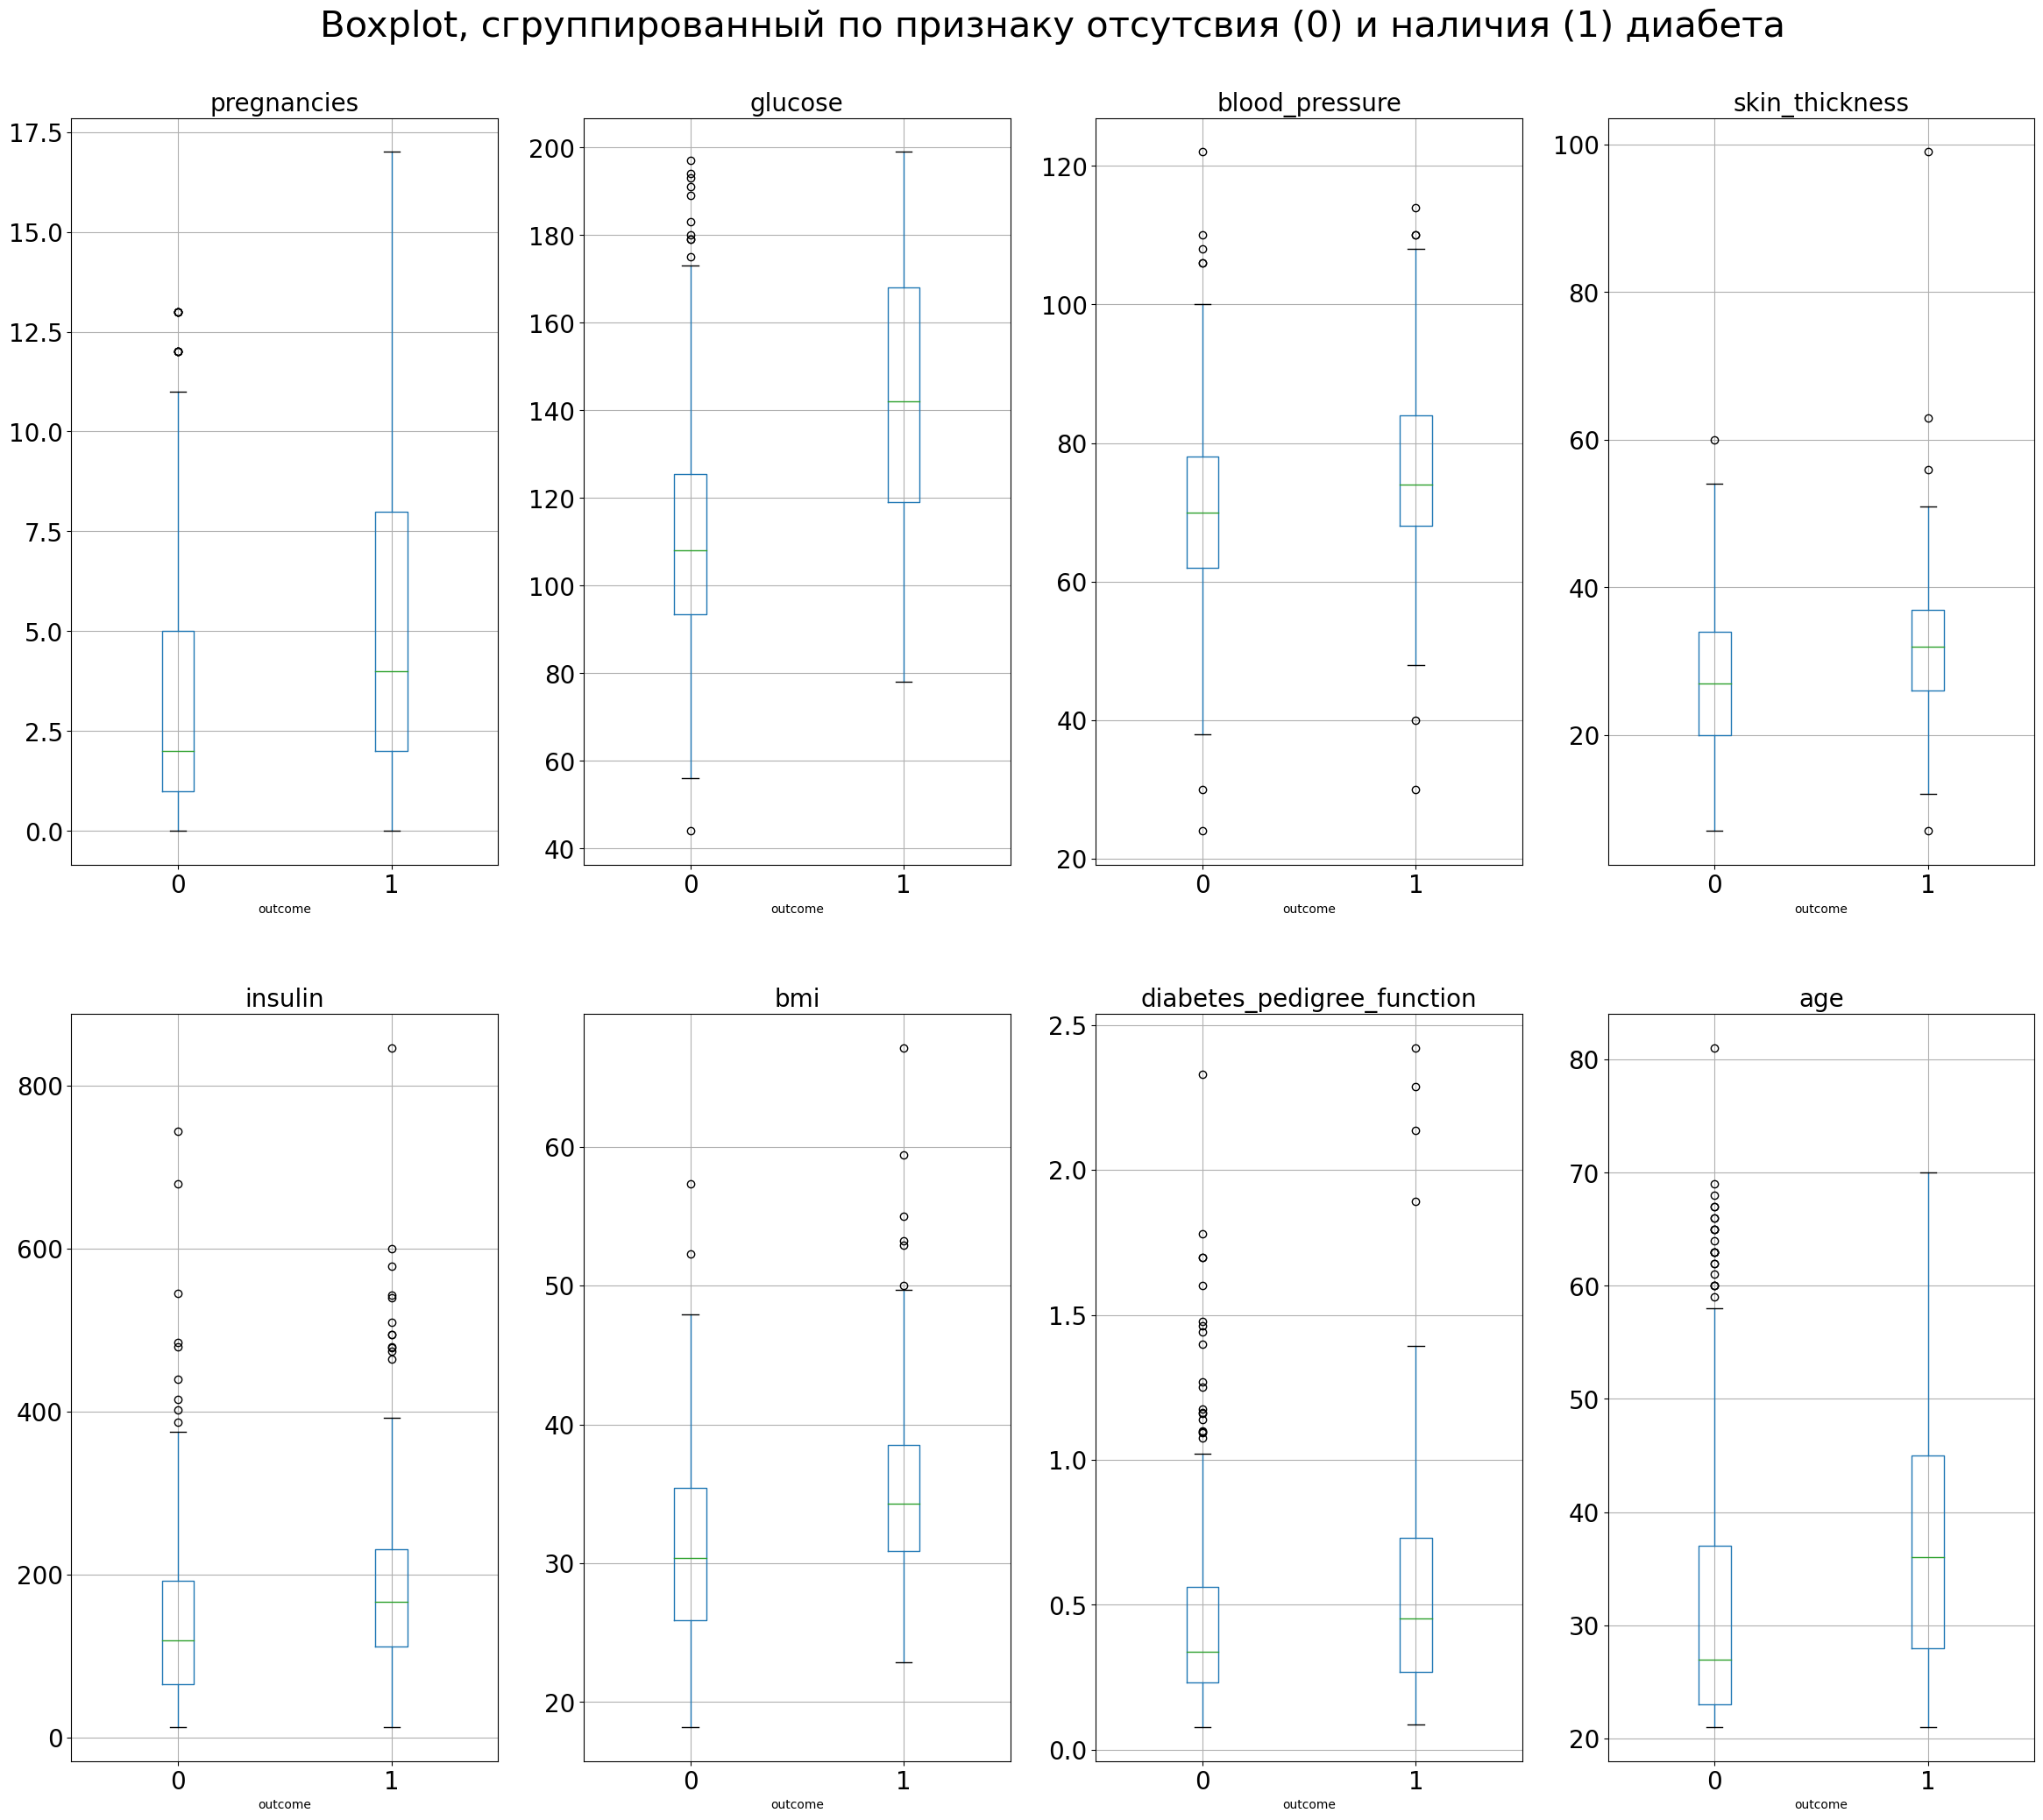

<Figure size 640x480 with 0 Axes>

In [609]:
fig, axs = plt.subplots(2, 4, figsize=(28, 25))
plt.figure()
for t, i in enumerate(df.columns.drop("outcome")):
    ax = axs[t // 4][t % 4]
    bp = df.boxplot(column=[i], by="outcome", ax= ax, figsize=(2.5,5))
    ax.tick_params(labelsize=20)
    ax.set_title(i, fontsize=20)
fig.suptitle("Boxplot, сгруппированный по признаку отсутсвия (0) и наличия (1) диабета", fontsize=30, y=0.95)
plt.show()

- **беременность:** у больных пациенток медианное значение и 75-ый процентиль находятся выше, чем у здоровых пациенток, то есть диабет чаще наблюдается у женщин которые рожали более двух детей;
- **уровень глюкозы:** у больных пациенток есть сильное смещение медианного значения вверх от медианного значения здоровых женщин, таким образом, женщины с повышенным уровнем глюкозы чаще оказываются в группе диабетиков;
- **кровяное давление:** смещение уже не так ярко выражено, как с глюкозой, но у женщин в группе с диагнозом диабет медианное значение выше, чем у здоровых женщин;
- **толщина кожи:** видимых различий между группами нет, у больных женщин есть смещение вверх по 25-му процентилю и незначительное увеличение медианного значения. Необходимо более подробное исследование, есть ли влияние этого фактора на риск возникновения диабета;
- **инсулин:** здесь мы так же видим большее медианное значение в группе женщин с диабетом, межквартальный размах в этой группе смещен вверх в соотношении со здоровыми пациентами.
- **масса тела:** и снова мы наблюдаем ярко выраженное смещение вверх межквартального размаха и медианных значений у больных пациенток, женщины с более высоким индексом массы тела чаще оказываются в группе диабетиков;
- **наследственные факторы:**  есть различия, указывающие, что в группе с диагнозом диабет чаще оказываются женщины с более высоким процентом функции;
- **возраст:** здоровые пациентки в основном в возрасте от 23 до 37 лет, пациентки с диагнозом диабет 28-45 лет, то есть опять есть смещение по возрасту в большую сторону в группе больных женщин. 

## Корреляция

In [610]:
! pip install phik

In [611]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [612]:
df_matrix = df.phik_matrix()

interval columns not set, guessing: ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']


In [613]:
df_matrix

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
pregnancies,1.000000,0.206536,0.204873,0.000000,0.000000,0.029298,0.000000,0.641472,0.307331
glucose,0.206536,1.000000,0.245078,0.154248,0.468119,0.292279,0.158122,0.285859,0.616294
blood_pressure,0.204873,0.245078,1.000000,0.000000,0.000000,0.521820,0.376532,0.298318,0.197394
skin_thickness,0.000000,0.154248,0.000000,1.000000,0.199053,0.710406,0.423064,0.149678,0.274376
insulin,0.000000,0.468119,0.000000,0.199053,1.000000,0.246094,0.453707,0.288380,0.285198
bmi,0.029298,0.292279,0.521820,0.710406,0.246094,1.000000,0.544742,0.000000,0.398302
diabetes_pedigree_function,0.000000,0.158122,0.376532,0.423064,0.453707,0.544742,1.000000,0.000000,0.240166
age,0.641472,0.285859,0.298318,0.149678,0.288380,0.000000,0.000000,1.000000,0.404326
outcome,0.307331,0.616294,0.197394,0.274376,0.285198,0.398302,0.240166,0.404326,1.000000


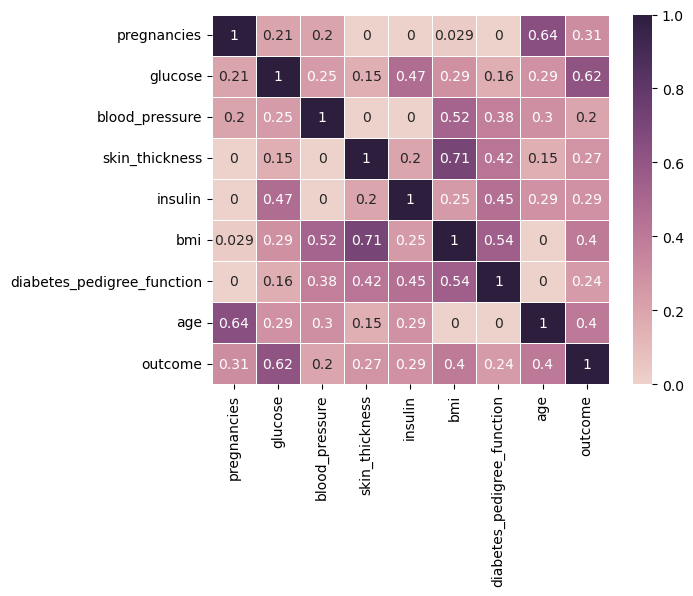

In [614]:
sns.heatmap(df_matrix, cmap=sns.cubehelix_palette(as_cmap=True), annot=True, linewidth=.5)
plt.show()

Для поиска взаимосвязей использовали метод корреляции phik, который позволяет выявить не только прямые зависимости. Из таблиц и тепловой карты, мы видим что самое высокое влияние на наличие диабета имеет уровень глюкозы в крови - 0,62 (средний уровень корреляции), так как корреляция положительная, можно сделать вывод, что при росте уровня глюкозы в крови возрастает риск диабета. Кроме уровня глюкозы, слабую корреляцию  имеют возраст пациента, индекс массы тела (0,4) и количество беременностей (0,3). Для остальных факторов к-т корреляции составил 0,2. Это считается слабой взаимосвязью. Очень слабых взаимосвязей и отрицательных взаимосвязей в таблице не оказалось, что подтверждает выводы, сделанные при анализе boxplot. 

# Гипотезы

Выдвинем несколько гипотез для окончательного вывода. 

## Гипотеза о влиянии возраста

H_0: женщины после 40 лет = женщины моложе 40 лет

H_1: женщины после 40 лет ≠ женщины моложе 40 лет

alpha = 0.01

In [615]:
age_40 = df[df['age'] >= 40]
age_y = df[df['age'] < 40]

In [616]:
results = st.ttest_ind(age_40['outcome'],age_y['outcome'], equal_var = False)
print(results.pvalue) 
alpha = 0.01
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

6.0738371829019035e-09
Отвергаем нулевую гипотезу


С вероятностью в 99% между группой женщин 40 лет и старше и группой моложе 40 лет есть статистически значимые различия.

## Гипотеза о влиянии кровяного давления

H_0: женщины с кровяным давлением не выше 70 = женщины с кровяным давлением выше 70

H_1: женщины с кровяным давлением не выше 70 ≠ женщины с кровяным давлением выше 70

alpha = 0.01

In [617]:
blood_70 = df[df['blood_pressure'] > 70]
blood_n = df[df['blood_pressure'] <= 70]

In [618]:
results = st.ttest_ind(blood_70['outcome'],blood_n['outcome'], equal_var = False)
print(results.pvalue) 
alpha = 0.01
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.000189738098397292
Отвергаем нулевую гипотезу


С вероятностью в 99% между группой женщин c давлением не выше 70 и  женщин с давлением выше 70 есть статистически значимые различия.

## Гипотеза о влиянии количества беременностей.

H_0: женщины с кол-вом беременностей не более трех = женщины с количеством беременностей больше трех

H_1: женщины с кол-вом беременностей не более трех ≠ женщины с количеством беременностей больше трех

alpha = 0.01

In [619]:
preg_3 = df[df['pregnancies'] <= 3]
preg_b = df[df['pregnancies'] > 3]

In [620]:
results = st.ttest_ind(preg_3['outcome'],preg_b['outcome'], equal_var = False)
print(results.pvalue) 
alpha = 0.01
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.6990176725121605e-07
Отвергаем нулевую гипотезу


С вероятностью в 99% между группой женщин c кол-вом беременностей не больше трех и группой женщин с кол-вом беременностей больше трех есть статистически значимые различия.

# Выводы

Проведено исследование факторов, влияющих на риск возникновения диабета, в ходе которого было установлено, что наибольшее влияние имеет уровень глюкозы в крови. Следует отметить, что все факторы, представленные в таблице имеют хоть какое-то влияние на возникновение диабета. Это подтвердили и гипотезы, выдвинутые в конце анализа.  Все значения в датасете заполнены и исследованы для дальнейшего построения моделей машинного обучения. 